In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Segmentation using Kmeans

(367, 550, 3)
(201850, 3)


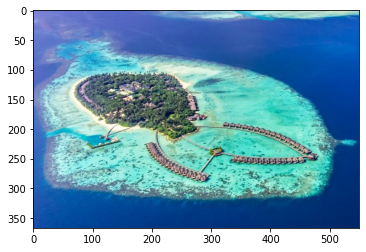

In [5]:
# Reading the image
img = cv2.imread('Images/maldives.jpg')

# converting to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape) # 3 channels

# Converting to 2D to apply kmeans
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

# Show image
plt.imshow(img)
plt.show()

### Applying Kmeans

In [26]:
# Criteria to stop applying kmeans
# it will stop after 100 iters or if it reaches 95 accuracy
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters ( as the image has 3 dominant colors)
k = 3

# Applying kmeans
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print(labels)
centers

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


array([[ 85.44246 , 131.69347 , 168.82503 ],
       [ 13.710926,  70.980125, 138.37524 ],
       [139.10341 , 216.82584 , 206.54237 ]], dtype=float32)

### Showing Results

[0 0 0 ... 1 1 1]


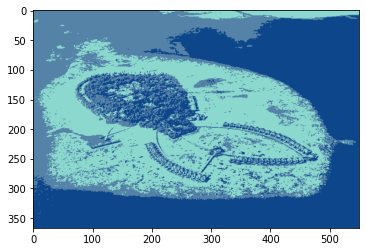

In [27]:
# Converting back to 8-bit values
centers = np.uint8(centers)

# flatten the labels
labels = labels.flatten()
print(labels)

# Converting each pixel to to color corresponds to its label
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Show
plt.imshow(segmented_image)
plt.show()

### To display only one color (cluster)

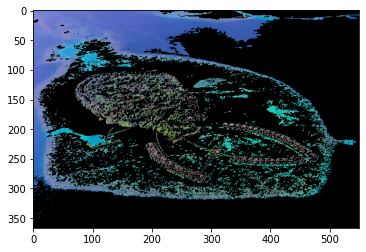

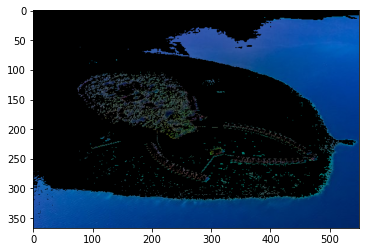

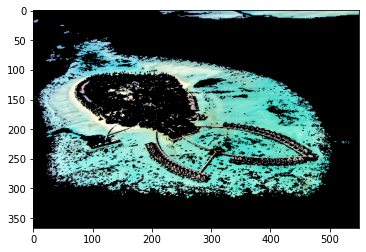

In [29]:
for i in range(3):
    masked_image = np.copy(img)
    masked_image = masked_image.reshape((-1,3))
    masked_image[labels != i] = [0, 0, 0]
    masked_image = masked_image.reshape(img.shape)
    plt.imshow(masked_image)
    plt.show()